<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/Decision_Tree_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Learning Classification: Decision Tree Code using a titanic dataset

In [1]:
#Decision Tree Code
#Importing our dataset from csv file
import pandas as pd
dataset=pd.read_csv("/content/titanic-passengers.csv", sep=";")
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

<ipython-input-1-759bf803b07e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
<ipython-input-1-759bf803b07e>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
<ipython-input-1-7

## Decision Tree Prediction

In [11]:

#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
# Renaming the variable to avoid conflict with the imported 'tree' module
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


## Decision Tree Visualization

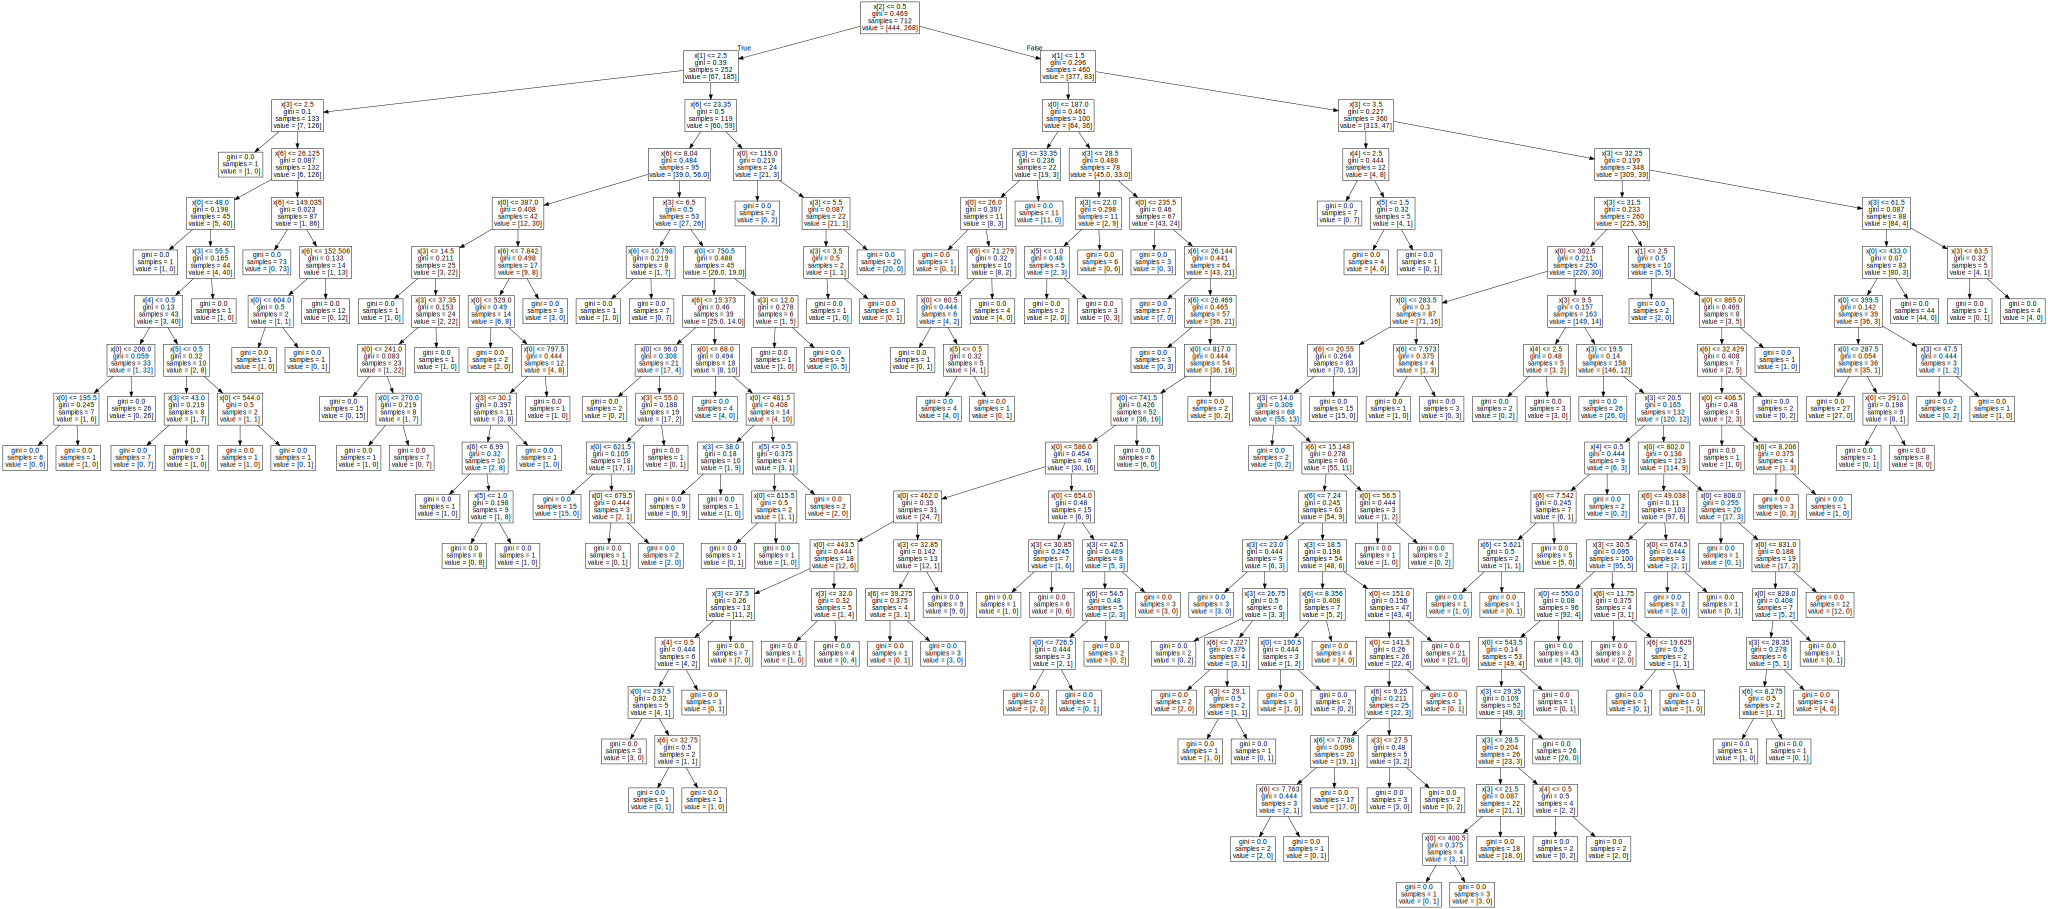

In [12]:

import graphviz
# Using the imported 'tree' module to call export_graphviz
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render('data')
graph